In [1]:
from linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data = pd.get_dummies(data,columns=["Extracurricular Activities"])
data["Extracurricular Activities_No"] = data["Extracurricular Activities_No"].astype("int32")
data["Extracurricular Activities_Yes"] = data["Extracurricular Activities_Yes"].astype("int32")

In [6]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [7]:
correlation_matrix = data.corr()

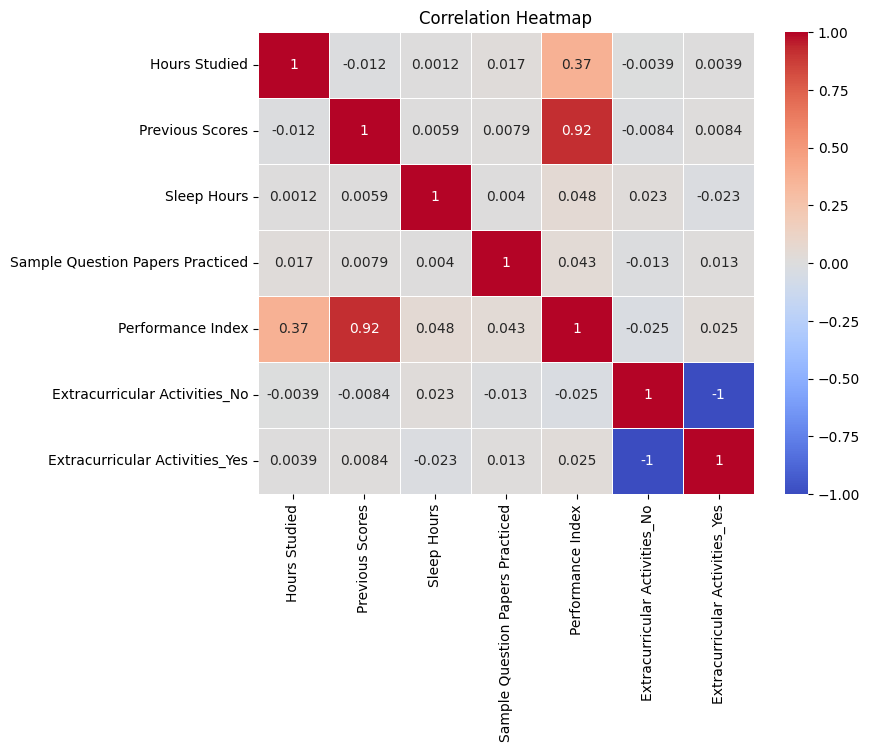

In [8]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

> we will take  previous scores  and  hours studied  as features for our linear regression model 


Text(0, 0.5, 'Performance index')

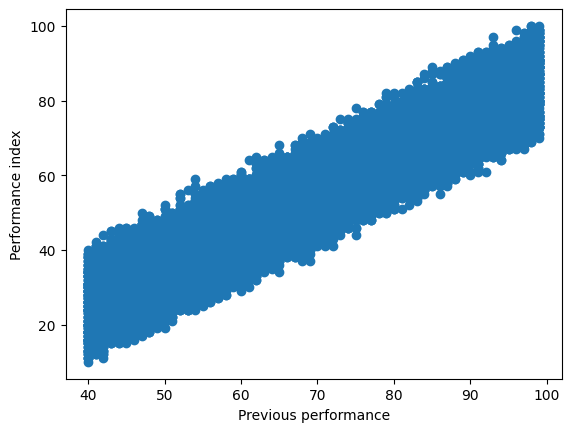

In [9]:
plt.scatter(data["Previous Scores"],data["Performance Index"])
plt.xlabel("Previous performance")
plt.ylabel("Performance index")

Text(0, 0.5, 'Performance index')

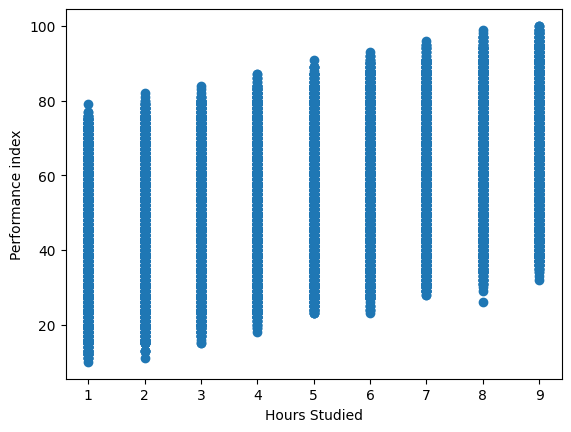

In [10]:
plt.scatter(data["Hours Studied"],data["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance index")

In [11]:
#split data into 80% training 20% testing
train_x = data[["Previous Scores","Hours Studied"]][:8000].to_numpy()
train_y = data["Performance Index"][:8000].to_numpy()
train_y = np.reshape(train_y,(1,8000))

test_x = data[["Previous Scores","Hours Studied"]][8000:].to_numpy()
test_y = data["Performance Index"][8000:].to_numpy()
test_y = np.reshape(test_y,(1,2000))

In [12]:
lr = LinearRegression(2)

In [13]:
lr.fit(300000,0.0001,train_x.T,train_y,50000,True)

epoch 0 | loss = 4170.917560883794
epoch 50000 | loss = 21.589060952544052
epoch 100000 | loss = 11.47770523558708
epoch 150000 | loss = 7.594190691791447
epoch 200000 | loss = 6.102631534538299
epoch 250000 | loss = 5.529761600745874


In [18]:
lr.mse(lr.forward_pass(train_x.T),train_y)

5.309736830392303

In [19]:
lr.r2(test_x.T,test_y)

0.9849100380454868

## Comparison with sklearn ##

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data[["Previous Scores","Hours Studied"]], data["Performance Index"], test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 5.241921186551513
R^2 Score: 0.985855014245765
